In [1]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [2]:
used_βs = 0:4
used_ts = 1:25

thin_used_ts = 1:7

colors = theme_palette(:auto)
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-scale")
;

In [67]:
function loadDataFrame(t, method)
    if method == :deepsdpdual; mstr = "deepsdp__dual"
    elseif method == :chordal; mstr = "chordal__single_decomp"
    elseif method == :chordal2; mstr = "chordal__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    
    filepath = joinpath(DUMP_DIR, "cartpole_t$(t)_$(mstr).csv")
    return CSV.File(filepath)
end

function loadThinDataFrame(t, method)
    if method == :deepsdp; mstr = "deepsdp"
    elseif method == :deepsdpdual; mstr = "deepsdp__dual"
    elseif method == :chordal; mstr = "chordal__single_decomp"
    elseif method == :chordal2; mstr = "chordal__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    
    filepath = joinpath(DUMP_DIR, "thin_cartpole_t$(t)_$(mstr).csv")
    return CSV.File(filepath)
end

# Order these by (method, beta) -> df
deepsdp_dual_dfs = [loadDataFrame(t, :deepsdpdual) for t in used_ts]
chordal_dfs = [loadDataFrame(t, :chordal) for t in 1:11] # We have less data here
chordal2_dfs = [loadDataFrame(t, :chordal2) for t in used_ts]

thin_deepsdp_dfs = [loadThinDataFrame(t, :deepsdp) for t in thin_used_ts]
thin_deepsdp_dual_dfs = [loadThinDataFrame(t, :deepsdpdual) for t in thin_used_ts]
thin_chordal_dfs = [loadThinDataFrame(t, :chordal) for t in thin_used_ts]
thin_chordal2_dfs = [loadThinDataFrame(t, :chordal2) for t in thin_used_ts]
;

In [97]:
# dfs are ordered by t
function plotDataFrames(batch; kwargs...)
    lenβs = length(used_βs)    
    marker_size, light, dark = 4, 0.2, 0.7
    plt = plot()
    
    for (dfs, label, color) in batch
        num_βs = length(dfs[1].beta)
        num_ts = length(dfs)
        curves = [[df.total_secs[β] for df in dfs] for β in 1:num_βs]    
        curve_mins = [minimum(df.total_secs) for df in dfs]
        curve_maxs = [maximum(df.total_secs) for df in dfs]
        plot!(plt, 1:num_ts, curves,
                color = color,
                marker = (:circle, marker_size),
                alpha = dark,
                label = "")
        plot!(plt, 1:num_ts, curve_mins, fillrange=curve_maxs,
                color = color,
                alpha = light,
                label = label)
    end
    
    plt = plot!(plt; kwargs...)
    
    return plt
end

plotDataFrames (generic function with 1 method)

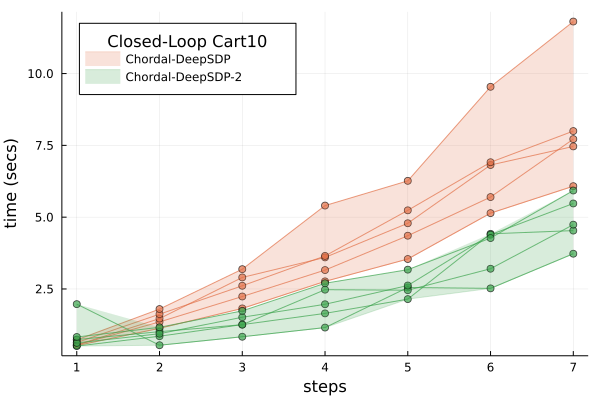

In [112]:
batch = [
#        (thin_deepsdp_dfs, "DeepSDP", colors[4]),
#          (thin_deepsdp_dual_dfs, "DeepSDP (Dualization.jl)", colors[1]),
         (thin_chordal_dfs, "Chordal-DeepSDP", colors[2]),
         (thin_chordal2_dfs, "Chordal-DeepSDP-2", colors[3])   
        ]
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
)
savefig(plt, joinpath(DUMP_DIR, "scale-chordal-vs-chordal2.png"))
plt

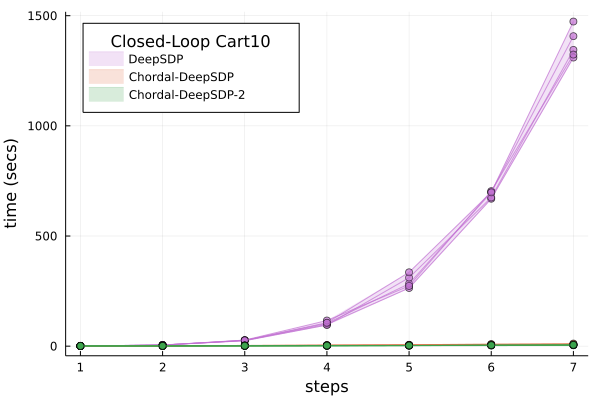

In [116]:
batch = [(thin_deepsdp_dfs, "DeepSDP", colors[4]),
#          (thin_deepsdp_dual_dfs, "DeepSDP (Dualization.jl)", colors[1]),
         (thin_chordal_dfs, "Chordal-DeepSDP", colors[2]),
         (thin_chordal2_dfs, "Chordal-DeepSDP-2", colors[3])   
        ]
plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart10",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
)
savefig(plt, joinpath(DUMP_DIR, "scale-deep-vs-chordal-vs-chordal2.png"))
plt

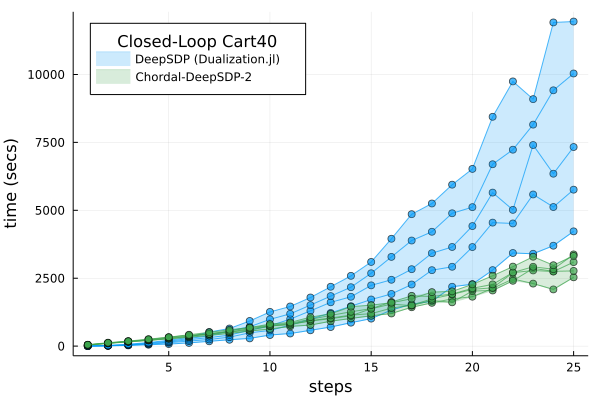

In [115]:
batch = [(deepsdp_dual_dfs, "DeepSDP (Dualization.jl)", colors[1]),
         (chordal2_dfs, "Chordal-DeepSDP-2", colors[3])]

plt = plotDataFrames(batch;
    legendtitle = "Closed-Loop Cart40",
    xlabel = "steps",
    ylabel = "time (secs)",
    legend = :topleft,
)
savefig(plt, joinpath(DUMP_DIR, "scale-deepdual-vs-chordal2.png"))
plt

In [101]:
DUMP_DIR

"/home/antonxue/stuff/nn-sdp/notebooks/../dump/cartpole-scale"